In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('A2Z_insurance.csv')

In [3]:
def FirstLook(df):
    
    """Given a dataFrame the function prints the best insights."""
    
    print("First 5 rows of the dataFrame: \n\n", df.head())
    print("Shape: \n\n", df.shape)
    print("Columns names: \n\n", df.columns)
    print("Columns types: \n\n", df.dtypes)
    print("Description: \n\n", df.describe())    

In [4]:
FirstLook(df)

First 5 rows of the dataFrame: 

    Customer Identity  First Policy´s Year  Brithday Year Educational Degree  \
0                  1               1985.0         1982.0    2 - High School   
1                  2               1981.0         1995.0    2 - High School   
2                  3               1991.0         1970.0          1 - Basic   
3                  4               1990.0         1981.0        3 - BSc/MSc   
4                  5               1986.0         1973.0        3 - BSc/MSc   

   Gross Monthly Salary  Geographic Living Area  Has Children (Y=1)  \
0                2177.0                     1.0                 1.0   
1                 677.0                     4.0                 1.0   
2                2277.0                     3.0                 0.0   
3                1099.0                     4.0                 1.0   
4                1763.0                     4.0                 1.0   

   Customer Monetary Value  Claims Rate  Premiums in LOB: Motor 

- First year policy max to high
- Birthday year min to low

In [5]:
df['Premiums Sum'] = df['Premiums in LOB: Motor'] +  df['Premiums in LOB: Household'] + df['Premiums in LOB: Health'] + df['Premiums in LOB:  Life'] + df['Premiums in LOB: Work Compensations']

df.head()

,Customer Identity,First Policy´s Year,Brithday Year,Educational Degree,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations,Premiums Sum
0,1,1985.0,1982.0,2 - High School,2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89,665.56
1,2,1981.0,1995.0,2 - High School,677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13,910.96
2,3,1991.0,1970.0,1 - Basic,2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02,740.60
3,4,1990.0,1981.0,3 - BSc/MSc,1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34,600.68
4,5,1986.0,1973.0,3 - BSc/MSc,1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45,629.24


In [6]:
df['Amount Paid by the Insurance Company'] = df['Claims Rate'] * df['Premiums Sum']

In [7]:
#Age Columns
df['Age'] = 2016 - df['Brithday Year']
df['Age As Client'] = 2016 - df['First Policy´s Year']

df.head()


,Customer Identity,First Policy´s Year,Brithday Year,Educational Degree,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations,Premiums Sum,Amount Paid by the Insurance Company,Age,Age As Client
0,1,1985.0,1982.0,2 - High School,2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89,665.56,259.5684,34.0,31.0
1,2,1981.0,1995.0,2 - High School,677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13,910.96,1020.2752,21.0,35.0
2,3,1991.0,1970.0,1 - Basic,2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02,740.60,207.3680,46.0,25.0
3,4,1990.0,1981.0,3 - BSc/MSc,1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34,600.68,594.6732,35.0,26.0
4,5,1986.0,1973.0,3 - BSc/MSc,1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45,629.24,566.3160,43.0,30.0


In [8]:
#Removing the guy from the future and the one with 965y.

print(df[df['Brithday Year'] == 1028.0].index) #Index 7195
print(df[df['First Policy´s Year'] == 53784].index) #Index 9254

df = df.drop([df.index[7195], df.index[9294]])

Int64Index([7195], dtype='int64')
Int64Index([9294], dtype='int64')


In [9]:
#Ordering the columns

df = df[['Customer Identity', 'First Policy´s Year', 'Brithday Year', 'Age', 'Age As Client', 
         'Claims Rate', 'Educational Degree', 'Geographic Living Area', 'Has Children (Y=1)',
       'Customer Monetary Value', 'Amount Paid by the Insurance Company', 'Gross Monthly Salary',
       'Premiums in LOB:  Life', 'Premiums in LOB: Health',
       'Premiums in LOB: Household', 'Premiums in LOB: Motor',
       'Premiums in LOB: Work Compensations']]

df.columns

Index(['Customer Identity', 'First Policy´s Year', 'Brithday Year', 'Age',
       'Age As Client', 'Claims Rate', 'Educational Degree',
       'Geographic Living Area', 'Has Children (Y=1)',
       'Customer Monetary Value', 'Amount Paid by the Insurance Company',
       'Gross Monthly Salary', 'Premiums in LOB:  Life',
       'Premiums in LOB: Health', 'Premiums in LOB: Household',
       'Premiums in LOB: Motor', 'Premiums in LOB: Work Compensations'],
      dtype='object')

In [10]:
df.isnull().sum()

Customer Identity                         0
First Policy´s Year                      30
Brithday Year                            17
Age                                      17
Age As Client                            30
Claims Rate                               0
Educational Degree                       17
Geographic Living Area                    1
Has Children (Y=1)                       21
Customer Monetary Value                   0
Amount Paid by the Insurance Company    225
Gross Monthly Salary                     36
Premiums in LOB:  Life                  104
Premiums in LOB: Health                  43
Premiums in LOB: Household                0
Premiums in LOB: Motor                   34
Premiums in LOB: Work Compensations      86
dtype: int64

In [11]:
df.shape

(10294, 17)

In [12]:
df = df.dropna()

In [13]:
df.shape

(9985, 17)

In [14]:
FirstLook(df)

First 5 rows of the dataFrame: 

    Customer Identity  First Policy´s Year  Brithday Year   Age  Age As Client  \
0                  1               1985.0         1982.0  34.0           31.0   
1                  2               1981.0         1995.0  21.0           35.0   
2                  3               1991.0         1970.0  46.0           25.0   
3                  4               1990.0         1981.0  35.0           26.0   
4                  5               1986.0         1973.0  43.0           30.0   

   Claims Rate Educational Degree  Geographic Living Area  Has Children (Y=1)  \
0         0.39    2 - High School                     1.0                 1.0   
1         1.12    2 - High School                     4.0                 1.0   
2         0.28          1 - Basic                     3.0                 0.0   
3         0.99        3 - BSc/MSc                     4.0                 1.0   
4         0.90        3 - BSc/MSc                     4.0                 

In [15]:
df[df['Brithday Year'] > df['First Policy´s Year']].shape

(1948, 17)

Let's drop those.

In [16]:
df = df[df['Brithday Year'] <= df['First Policy´s Year']]
df

,Customer Identity,First Policy´s Year,Brithday Year,Age,Age As Client,Claims Rate,Educational Degree,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Amount Paid by the Insurance Company,Gross Monthly Salary,Premiums in LOB: Life,Premiums in LOB: Health,Premiums in LOB: Household,Premiums in LOB: Motor,Premiums in LOB: Work Compensations
0,1,1985.0,1982.0,34.0,31.0,0.39,2 - High School,1.0,1.0,380.97,259.5684,2177.0,47.01,146.36,79.45,375.85,16.89
2,3,1991.0,1970.0,46.0,25.0,0.28,1 - Basic,3.0,0.0,504.67,207.3680,2277.0,86.35,124.58,224.50,206.15,99.02
3,4,1990.0,1981.0,35.0,26.0,0.99,3 - BSc/MSc,4.0,1.0,-16.99,594.6732,1099.0,35.34,311.17,43.35,182.48,28.34
4,5,1986.0,1973.0,43.0,30.0,0.90,3 - BSc/MSc,4.0,1.0,35.23,566.3160,1763.0,18.78,182.59,47.80,338.62,41.45
5,6,1986.0,1956.0,60.0,30.0,1.00,2 - High School,4.0,1.0,-24.33,589.1200,2566.0,7.00,114.80,18.90,440.75,7.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10291,10292,1984.0,1949.0,67.0,32.0,0.96,4 - PhD,2.0,0.0,-0.11,615.8976,3188.0,9.78,173.81,49.45,393.74,14.78
10292,10293,1977.0,1952.0,64.0,39.0,0.00,1 - Basic,3.0,0.0,1405.60,0.0000,2431.0,12.89,143.25,1035.75,133.58,105.13
10293,10294,1994.0,1976.0,40.0,22.0,0.21,3 - BSc/MSc,1.0,1.0,524.10,146.2104,2918.0,12.67,142.25,132.80,403.63,4.89
10294,10295,1981.0,1977.0,39.0,35.0,0.65,1 - Basic,2.0,1.0,250.05,503.6980,1971.0,63.90,198.37,211.15,188.59,112.91


In [17]:
#to_remove = list(df_wrong['Brithday Year'])

#MAFALDA: This is not running and I don't know where this comes from

In [18]:
df.duplicated().sum()

0

In [19]:
#let's see how many people here are younger than 16 so we can remove them since they're legally not allowed to work

df.loc[df['Age'] < 16]

#they seem to have disappeared after you drop all nulls

,Customer Identity,First Policy´s Year,Brithday Year,Age,Age As Client,Claims Rate,Educational Degree,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Amount Paid by the Insurance Company,Gross Monthly Salary,Premiums in LOB: Life,Premiums in LOB: Health,Premiums in LOB: Household,Premiums in LOB: Motor,Premiums in LOB: Work Compensations


In [20]:
#the code to remove the children, if they were here lol, would be:

df.drop(df['Age'] < 16)

#which doesn't work right now because somehow the children have all been removed ¯\_(ツ)_/¯

KeyError: '[False False False ... False False False] not found in axis'

In [21]:
df.head()

,Customer Identity,First Policy´s Year,Brithday Year,Age,Age As Client,Claims Rate,Educational Degree,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Amount Paid by the Insurance Company,Gross Monthly Salary,Premiums in LOB: Life,Premiums in LOB: Health,Premiums in LOB: Household,Premiums in LOB: Motor,Premiums in LOB: Work Compensations
0,1,1985.0,1982.0,34.0,31.0,0.39,2 - High School,1.0,1.0,380.97,259.5684,2177.0,47.01,146.36,79.45,375.85,16.89
2,3,1991.0,1970.0,46.0,25.0,0.28,1 - Basic,3.0,0.0,504.67,207.3680,2277.0,86.35,124.58,224.50,206.15,99.02
3,4,1990.0,1981.0,35.0,26.0,0.99,3 - BSc/MSc,4.0,1.0,-16.99,594.6732,1099.0,35.34,311.17,43.35,182.48,28.34
4,5,1986.0,1973.0,43.0,30.0,0.90,3 - BSc/MSc,4.0,1.0,35.23,566.3160,1763.0,18.78,182.59,47.80,338.62,41.45
5,6,1986.0,1956.0,60.0,30.0,1.00,2 - High School,4.0,1.0,-24.33,589.1200,2566.0,7.00,114.80,18.90,440.75,7.67


In [22]:
import os
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib
from matplotlib import pyplot as plt

In [23]:
var_cluster = df.loc[:,[#'First Policy´s Year', 
                    #'Brithday Year',
                   #'Age',
                   #'Age As Client',
                   #'Geographic Living Area',
                   #'Has Children (Y=1)',
                   #'Customer Monetary Value',
                   #'Amount Paid by the Insurance Company',
                   #'Gross Monthly Salary',
                   #'Premiums in LOB: Life',
                    'Premiums in LOB: Health',
                    'Premiums in LOB: Household',
                    'Premiums in LOB: Motor',
                    'Premiums in LOB: Work Compensations']].reindex()
var_cluster

,Premiums in LOB: Health,Premiums in LOB: Household,Premiums in LOB: Motor,Premiums in LOB: Work Compensations
0,146.36,79.45,375.85,16.89
2,124.58,224.50,206.15,99.02
3,311.17,43.35,182.48,28.34
4,182.59,47.80,338.62,41.45
5,114.80,18.90,440.75,7.67
...,...,...,...,...
10291,173.81,49.45,393.74,14.78
10292,143.25,1035.75,133.58,105.13
10293,142.25,132.80,403.63,4.89
10294,198.37,211.15,188.59,112.91


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cluster_Norm = scaler.fit_transform(var_cluster)
cluster_Norm = pd.DataFrame(cluster_Norm, columns = var_cluster.columns)

In [25]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,
               random_state=0,
               n_init=5,
               max_iter=30).fit(cluster_Norm)

my_clusters = kmeans.cluster_centers_
scaler.inverse_transform(X = my_clusters)
my_clusters = pd.DataFrame(scaler.inverse_transform(X = my_clusters),
                          columns = var_cluster.columns)

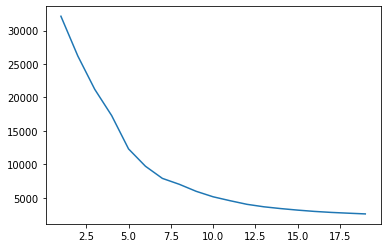

In [26]:
L = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,
                   random_state=0,
                   n_init=5,
                   max_iter=200).fit(cluster_Norm)
    L.append(kmeans.inertia_)
plt.plot(range(1,20),L)

In [27]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters,
               random_state=0,
               n_init=10,
               max_iter=2000).fit(cluster_Norm)
my_clusters = pd.DataFrame(kmeans.cluster_centers_)

In [28]:
my_clusters

,0,1,2,3
0,-0.365321,-0.252057,0.424039,-0.445875
1,0.470208,0.304039,-0.545632,0.573625
2,-1.164154,70.853732,0.816573,-0.490948


Plot clusters

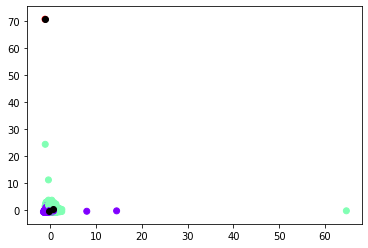

In [29]:
plt.scatter(cluster_Norm.iloc[:, 0].values, cluster_Norm.iloc[:, 1].values, c=kmeans.labels_, cmap='rainbow') #c=kmeans, cmap='viridis')
# add centroids
plt.scatter(my_clusters.iloc[:, 0].values, my_clusters.iloc[:, 1].values, c='black');

I sincerely apologize for this crappy plot!

In [30]:
# Check clusters a bit further
my_clusters = pd.DataFrame(scaler.inverse_transform(X=my_clusters),
                          columns=var_cluster.columns)
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(cluster_Norm, kmeans.labels_)

print("For n_clusters=", n_clusters,
     "The average silhouette_score is:", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(cluster_Norm, kmeans.labels_)
cluster_labels = kmeans.labels_
cluster_labels


For n_clusters= 3 The average silhouette_score is: 0.37597772520306255


array([0, 1, 1, ..., 0, 1, 0])

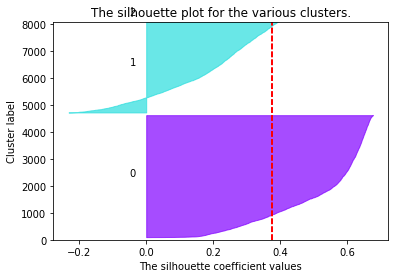

In [31]:
import matplotlib.cm as cm
y_lower = 100
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_ylim([0, cluster_Norm.shape[0] + (n_clusters + 1) * 10])

for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.rainbow(float(i) / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                    0, ith_cluster_silhouette_values,
                    facecolor=color,
                    edgecolor=color,
                    alpha=0.7)
    
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
    y_lower = y_upper + 100
    
    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    
plt.show()

In [32]:
df.columns

Index(['Customer Identity', 'First Policy´s Year', 'Brithday Year', 'Age',
       'Age As Client', 'Claims Rate', 'Educational Degree',
       'Geographic Living Area', 'Has Children (Y=1)',
       'Customer Monetary Value', 'Amount Paid by the Insurance Company',
       'Gross Monthly Salary', 'Premiums in LOB:  Life',
       'Premiums in LOB: Health', 'Premiums in LOB: Household',
       'Premiums in LOB: Motor', 'Premiums in LOB: Work Compensations'],
      dtype='object')

In [33]:
df.head()

,Customer Identity,First Policy´s Year,Brithday Year,Age,Age As Client,Claims Rate,Educational Degree,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Amount Paid by the Insurance Company,Gross Monthly Salary,Premiums in LOB: Life,Premiums in LOB: Health,Premiums in LOB: Household,Premiums in LOB: Motor,Premiums in LOB: Work Compensations
0,1,1985.0,1982.0,34.0,31.0,0.39,2 - High School,1.0,1.0,380.97,259.5684,2177.0,47.01,146.36,79.45,375.85,16.89
2,3,1991.0,1970.0,46.0,25.0,0.28,1 - Basic,3.0,0.0,504.67,207.3680,2277.0,86.35,124.58,224.50,206.15,99.02
3,4,1990.0,1981.0,35.0,26.0,0.99,3 - BSc/MSc,4.0,1.0,-16.99,594.6732,1099.0,35.34,311.17,43.35,182.48,28.34
4,5,1986.0,1973.0,43.0,30.0,0.90,3 - BSc/MSc,4.0,1.0,35.23,566.3160,1763.0,18.78,182.59,47.80,338.62,41.45
5,6,1986.0,1956.0,60.0,30.0,1.00,2 - High School,4.0,1.0,-24.33,589.1200,2566.0,7.00,114.80,18.90,440.75,7.67


Divide variables into Categorical and Value Cluster

In [34]:
cat_var = df[[#'First Policy´s Year',
             #'Brithday Year',
             #'Age As Client',
              'Educational Degree',
             'Geographic Living Area',
             'Has Children (Y=1)']]
val_var = df[['Claims Rate',
              'Customer Monetary Value',
             'Amount Paid by the Insurance Company',
             'Gross Monthly Salary',
             'Premiums in LOB:  Life',
             'Premiums in LOB: Health',
             'Premiums in LOB: Household',
             'Premiums in LOB: Motor',
             'Premiums in LOB: Work Compensations']]

Map var 'Educational Degree' to integers

In [35]:
#df['Educational Degree'] = df.map({'1 - Basic':1, '2 - High School':2, '3 - BSc/MSc':3})
s = df['Educational Degree']
s = s.map({'1 - Basic':1, '2 - High School':2, '3 - BSc/MSc':3})
df['Educational Degree'] = s

In [36]:
s

0        2.0
2        1.0
3        3.0
4        3.0
5        2.0
        ... 
10291    NaN
10292    1.0
10293    3.0
10294    1.0
10295    NaN
Name: Educational Degree, Length: 8037, dtype: float64

KMode discretize variables
Birthday: decades

Discretization: pandas qcut

In [39]:
cut_bday = df['Brithday Year']
cut_bday = pd.qcut(cut_bday, 10)
cut_bday.values.unique()

[(1977.0, 1983.0], (1967.0, 1972.0], (1972.0, 1977.0], (1953.0, 1957.0], (1934.999, 1943.0], (1943.0, 1948.0], (1957.0, 1962.0], (1948.0, 1953.0], (1983.0, 1997.0], (1962.0, 1967.0]]
Categories (10, interval[float64]): [(1934.999, 1943.0] < (1943.0, 1948.0] < (1948.0, 1953.0] < (1953.0, 1957.0] ... (1967.0, 1972.0] < (1972.0, 1977.0] < (1977.0, 1983.0] < (1983.0, 1997.0]]

In [40]:
from kmodes.kmodes import KModes
# 'Brithday Year' 'Educational Degree', 'Has Children (Y=1)'
VE_Cat = ['cut_bday', df['Educational Degree']]#.astype('str')

# =============================================================================
# for j in list(VE_Cat):
#     VE_Cat[j].replace(to_replace = '', value = 'TESTE', inplace = True)
# =============================================================================

# =============================================================================
# for j in list(VE_Cat):
#      VE_Cat.drop(VE_Cat[VE_Cat[j]==''].index, inplace = True)
# =============================================================================


#for j in list(VE_Cat):
#    for i in range(VE_Cat.shape[0]):
#        if VE_Cat.loc[i,j] == '':
#            VE_Cat.loc[i,j] = 'Missing'

km = KModes(n_clusters=4, init='random', n_init=50, verbose=1)

clusters = km.fit_predict(VE_Cat)

print(km.cluster_centroids_)

ValueError: Expected 2D array, got 1D array instead:
array=['cut_bday'
 0        2.0
2        1.0
3        3.0
4        3.0
5        2.0
        ... 
10291    NaN
10292    1.0
10293    3.0
10294    1.0
10295    NaN
Name: Educational Degree, Length: 8037, dtype: float64].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.